# The Dollar Tree Website

## Multi-class classification

The data set is about the sales of items on the Dollar Tree Website. 
The task is to train one (1) classification algorithm (K-Nearest Neighbours, Stochastic Gradient Descent, Naïve Bayes, etc.) to predict the product category based on the other features. 

You may drop whatever columns you feel are not important for this training. Note that you will have to justify this during your presentation.

     * The project focuses on the data preparation, modeling, and evaluation phase of the CRISP-DM. 

In [2]:
# Import the necessary libraries needed for this
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
# Load the data
data = pd.read_csv("dollar_tree.csv")
data

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,2/7/2016,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,3/13/2015,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,4/5/2015,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,8/30/2015,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


## 1. Data Understanding and Preparation

In [6]:
# Check the info 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [7]:
# Convert date to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Check the dtype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             34867 non-null  int64         
 1   Date              34866 non-null  datetime64[ns]
 2   Year              34866 non-null  float64       
 3   Month             34866 non-null  object        
 4   Customer Age      34866 non-null  float64       
 5   Customer Gender   34866 non-null  object        
 6   Country           34866 non-null  object        
 7   State             34866 non-null  object        
 8   Product Category  34866 non-null  object        
 9   Sub Category      34866 non-null  object        
 10  Quantity          34866 non-null  float64       
 11  Unit Cost         34866 non-null  float64       
 12  Unit Price        34866 non-null  float64       
 13  Cost              34866 non-null  float64       
 14  Revenue           3486

In [8]:
# List all elements in the columns

for i, column in enumerate(data.columns):
    print(f'Column-{i + 1}: {column}\n', data[column].unique())
    print('='* 70)

Column-1: index
 [    0     1     2 ... 34864 34865 34866]
Column-2: Date
 <DatetimeArray>
['2016-02-19 00:00:00', '2016-02-20 00:00:00', '2016-02-27 00:00:00',
 '2016-03-12 00:00:00', '2016-04-08 00:00:00', '2016-04-17 00:00:00',
 '2016-06-22 00:00:00', '2016-06-24 00:00:00', '2016-07-01 00:00:00',
 '2016-07-22 00:00:00',
 ...
 '2015-02-27 00:00:00', '2015-01-21 00:00:00', '2015-04-06 00:00:00',
 '2015-06-20 00:00:00', '2015-01-29 00:00:00', '2015-04-26 00:00:00',
 '2015-03-13 00:00:00', '2015-01-27 00:00:00', '2015-02-07 00:00:00',
                 'NaT']
Length: 577, dtype: datetime64[ns]
Column-3: Year
 [2016. 2015.   nan]
Column-4: Month
 ['February' 'March' 'April' 'June' 'July' 'August' 'September' 'October'
 'November' 'December' 'May' 'January' nan]
Column-5: Customer Age
 [29. 18. 19. 20. 22. 24. 40. 21. 23. 25. 30. 55. 53. 52. 51. 50. 49. 48.
 47. 46. 45. 41. 42. 65. 64. 32. 33. 63. 34. 35. 43. 62. 37. 44. 60. 59.
 58. 36. 61. 57. 54. 38. 39. 27. 28. 17. 26. 67. 66. 71. 31. 

In [9]:
# Check for missing values
data.isna().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64

In [10]:
# Drop Columns you do not need
data= data. drop(['index','Column1'], axis = 1)

data

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,2016-02-07,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000
34863,2015-03-13,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000
34864,2015-04-05,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000
34865,2015-08-30,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000


In [11]:
# drop missing values
data = data.dropna()
data

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,2015-03-22,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0
34862,2016-02-07,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0
34863,2015-03-13,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0
34864,2015-04-05,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0


In [12]:
# Check for duplicated values
data.duplicated().sum()

1

In [13]:
# Show the duplicated value

data.loc[data.duplicated()]

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
869,2015-08-12,2015.0,August,43.0,F,Germany,Bayern,Accessories,Bottles and Cages,2.0,10.0,14.0,20.0,28.0


In [16]:
# Drop the duplicate
data.drop_duplicates(inplace = True)


In [17]:
# Descriptive statistics for numerical columns
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,34865,2016-01-19 18:41:43.530761472,2015-01-01 00:00:00,2015-10-26 00:00:00,2016-01-28 00:00:00,2016-04-26 00:00:00,2016-07-31 00:00:00,NaN
Year,34865.0,2015.569253,2015.0,2015.0,2016.0,2016.0,2016.0,0.495188
Customer Age,34865.0,36.382705,17.0,28.0,35.0,44.0,87.0,11.113005
Quantity,34865.0,2.002524,1.0,1.0,2.0,3.0,3.0,0.813948
Unit Cost,34865.0,349.890315,0.67,45.0,150.0,455.0,3240.0,490.019492
Unit Price,34865.0,389.243248,0.666667,53.666667,179.0,521.0,5082.0,525.322781
Cost,34865.0,576.020479,2.0,85.0,261.0,769.0,3600.0,690.503877
Revenue,34865.0,640.887652,2.0,102.0,319.0,902.0,5082.0,736.653849


In [18]:
# Descriptive statistics for categorical columns 
data.describe(include="object").T

,count,unique,top,freq
Month,34865,12,June,3680
Customer Gender,34865,2,M,17805
Country,34865,4,United States,18076
State,34865,45,California,10332
Product Category,34865,3,Accessories,22533
Sub Category,34865,17,Tires and Tubes,11112


In [19]:
# Check for the numerical columns
numeric_columns = data.select_dtypes('number').columns
numeric_columns

Index(['Year', 'Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost',
       'Revenue'],
      dtype='object')

In [20]:
# Check for the correlation of the continuous variables
correlation = data[numeric_columns].corr()
correlation

,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue
Year,1.000000,0.049894,0.000918,-0.073270,-0.022653,-0.084595,-0.025389
Customer Age,0.049894,1.000000,0.004383,0.022374,0.023424,0.023655,0.024851
Quantity,0.000918,0.004383,1.000000,-0.312516,-0.324111,0.008295,0.008418
Unit Cost,-0.073270,0.022374,-0.312516,1.000000,0.981032,0.854906,0.836954
Unit Price,-0.022653,0.023424,-0.324111,0.981032,1.000000,0.832966,0.851031
Cost,-0.084595,0.023655,0.008295,0.854906,0.832966,1.000000,0.979119
Revenue,-0.025389,0.024851,0.008418,0.836954,0.851031,0.979119,1.000000


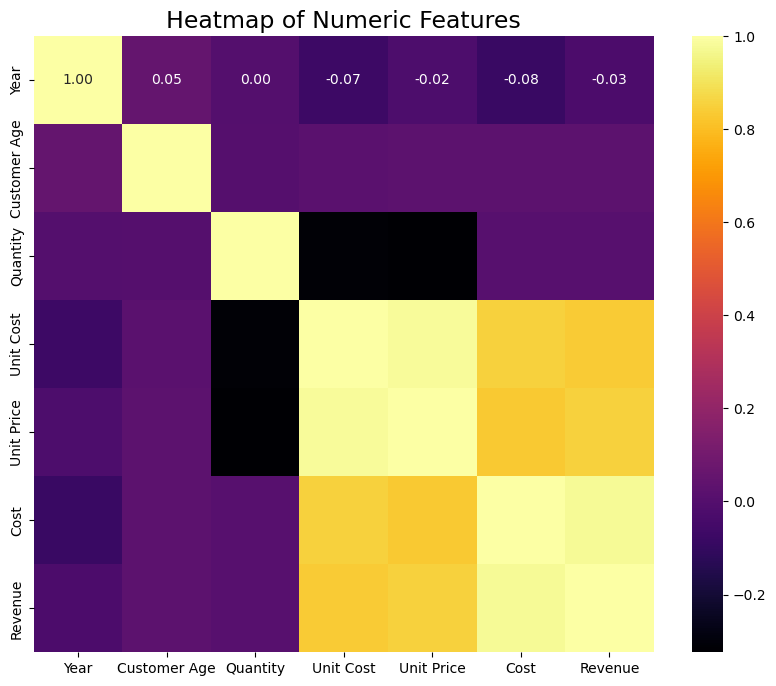

In [22]:
# Check for the correlation of the continuous variables using Heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='inferno')
plt.title('Heatmap of Numeric Features', fontsize=17)
plt.show()

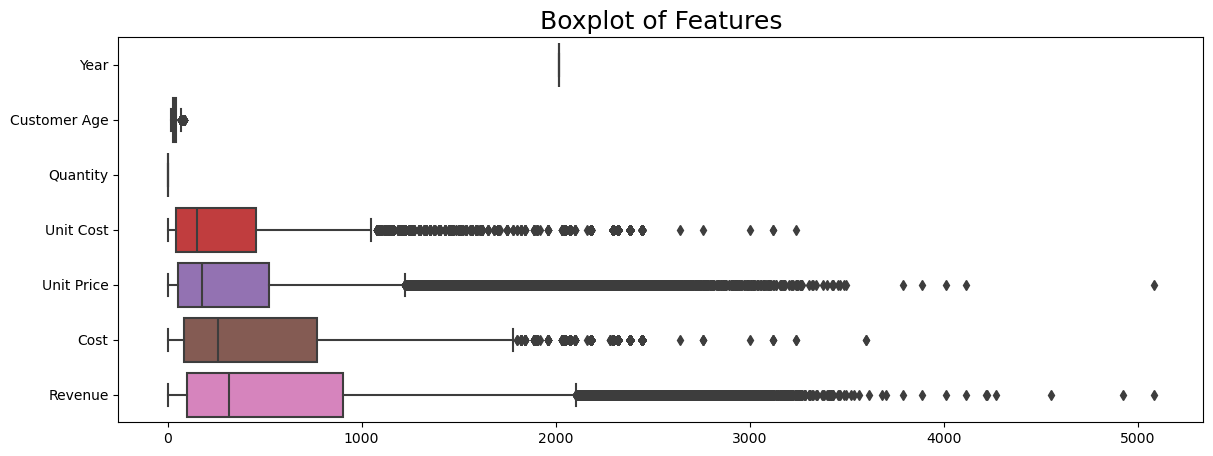

In [23]:
# Describe the continuous variables
plt.figure(figsize=(14, 5)) 
sns.boxplot(data,orient='h')
plt.title('Boxplot of Features', fontsize=18)
plt.show()

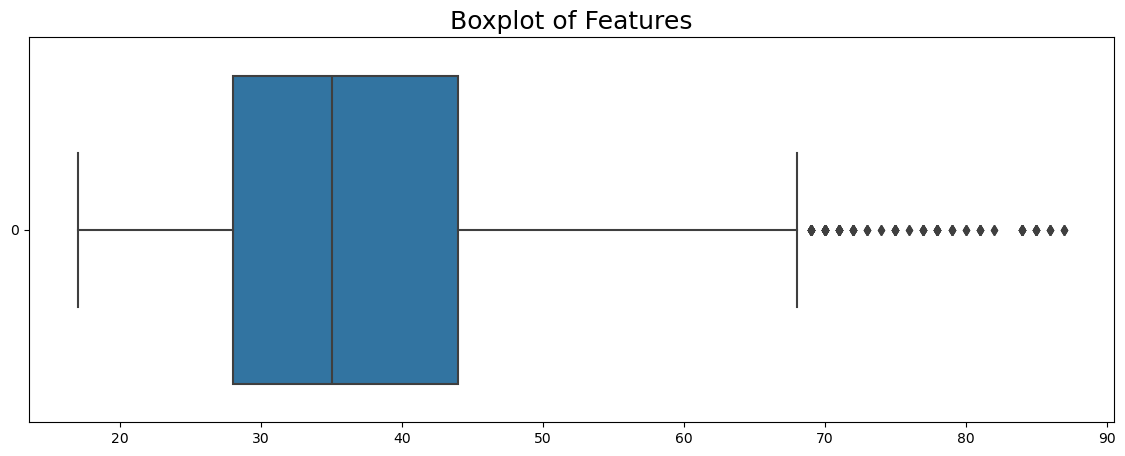

In [24]:
# Box plot for just age
plt.figure(figsize=(14, 5)) 
sns.boxplot(data['Customer Age'],orient='h')
plt.title('Boxplot of Features', fontsize=18)
plt.show()

In [25]:
# Check for the categorical columns 
categorical_columns = data.select_dtypes('object').columns
categorical_columns

Index(['Month', 'Customer Gender', 'Country', 'State', 'Product Category',
       'Sub Category'],
      dtype='object')

In [26]:
# Change M & F
data['Customer Gender'] = data['Customer Gender'].replace('M', 'Male')
data['Customer Gender'] = data['Customer Gender'].replace('F', 'Female')
data

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,2016.0,February,29.0,Female,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2016-02-20,2016.0,February,29.0,Female,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2016-02-27,2016.0,February,29.0,Female,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,2016-03-12,2016.0,March,29.0,Female,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,2016-03-12,2016.0,March,29.0,Female,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,2015-03-22,2015.0,March,38.0,Male,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0
34862,2016-02-07,2016.0,February,38.0,Male,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0
34863,2015-03-13,2015.0,March,38.0,Male,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0
34864,2015-04-05,2015.0,April,38.0,Male,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0


#### **Answering Analytical Questions**

**1. Contribution to Revenue by Product Category**

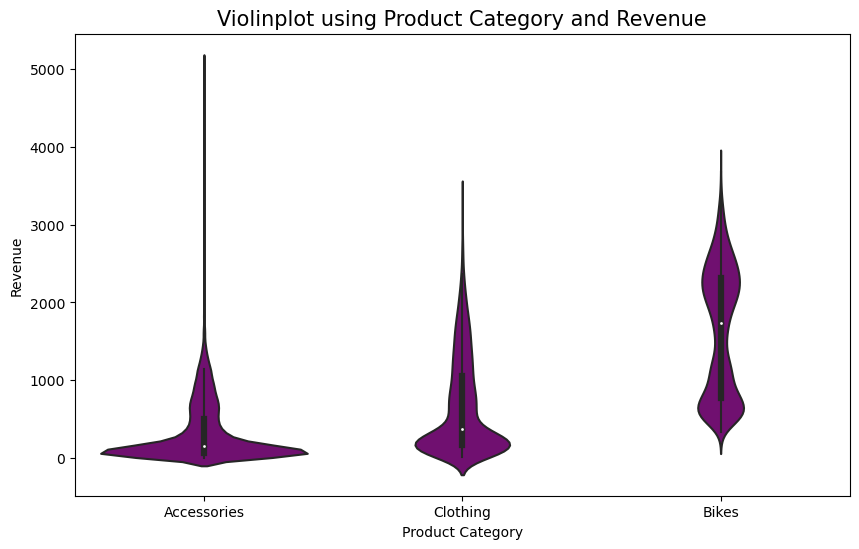

In [29]:
plot a violinplot using product category and revenue

plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Product Category', y='Revenue',color='purple')
plt.title('Violinplot using Product Category and Revenue', fontsize=15)
plt.show()

**2. Which Product and Sub Category has the highest counts?**

In [30]:
pro_sub = data.groupby('Product Category')['Sub Category'].value_counts().rename('Breakdown')
pro_sub = pro_sub.reset_index()
pro_sub

,Product Category,Sub Category,Breakdown
0,Accessories,Tires and Tubes,11112
1,Accessories,Bottles and Cages,5294
2,Accessories,Helmets,4176
3,Accessories,Fenders,762
4,Accessories,Cleaners,545
5,Accessories,Hydration Packs,396
6,Accessories,Bike Stands,145
7,Accessories,Bike Racks,103
8,Bikes,Road Bikes,3022
9,Bikes,Mountain Bikes,2737


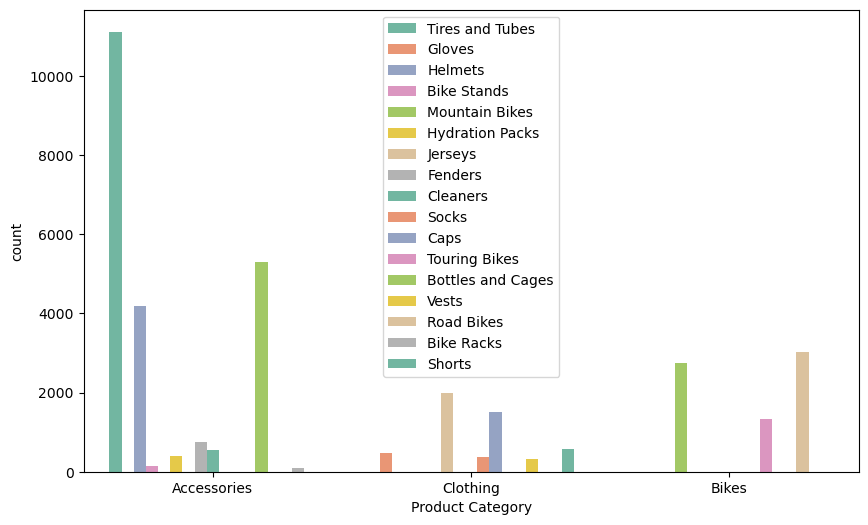

In [31]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Product Category', hue='Sub Category', palette="Set2")
plt.legend(loc='best')
plt.show()

**3. What are the percentages for Product Category?**

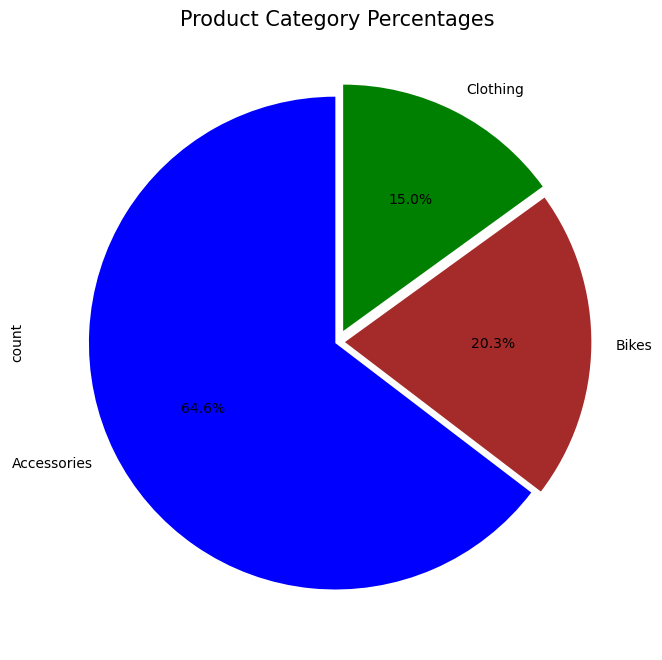

In [34]:
plt.figure(figsize=(10, 8))
data['Product Category'].value_counts().plot.pie(startangle=90, explode=(0.01, 0.03, 0.05), colors=['blue','brown','green'], autopct='%.1f%%')
plt.title('Product Category Percentages', fontsize=15)
plt.show()

**4. What are the percentages for Males and Females?**

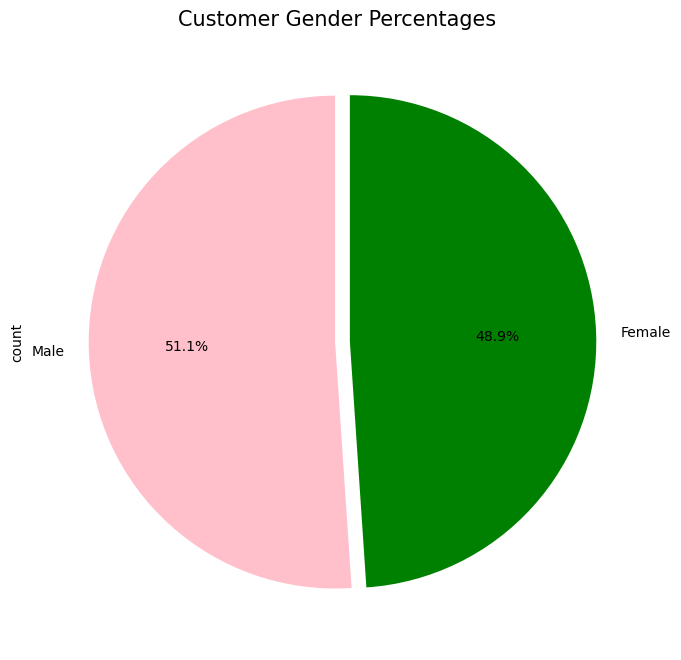

In [35]:
plt.figure(figsize=(10, 8))
data['Customer Gender'].value_counts().plot.pie(startangle=90, explode=(0.01, 0.05), colors=['pink','green'], autopct='%.1f%%')
plt.title('Customer Gender Percentages', fontsize=15)
plt.show()

**5. How many countries do we have?**

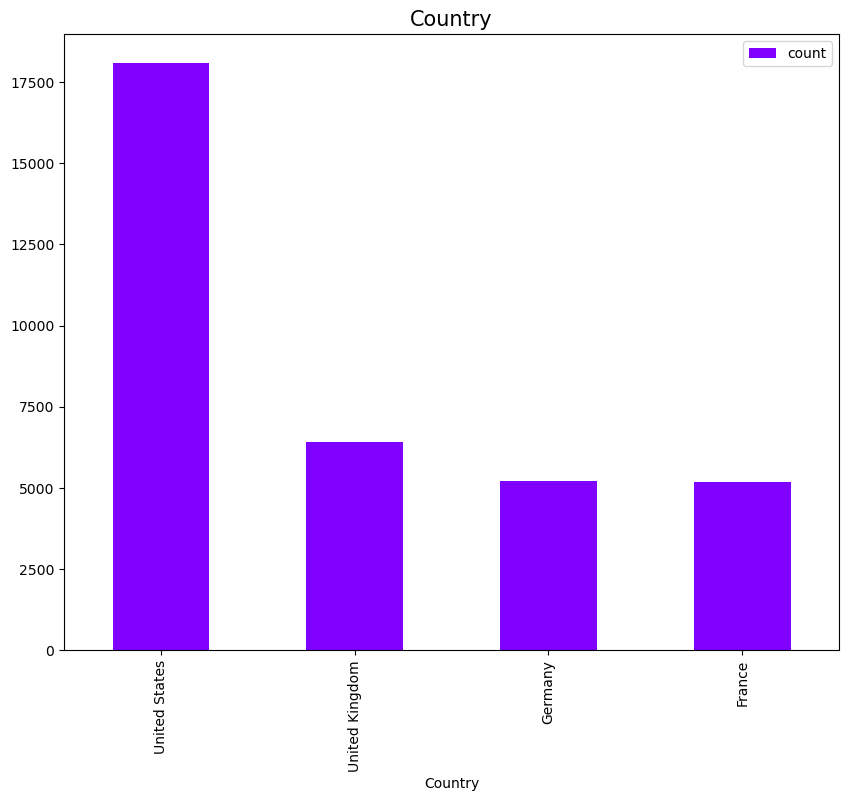

In [37]:
plt.figure(figsize=(10, 8))
data['Country'].value_counts().plot.bar(cmap=plt.get_cmap('rainbow'))
plt.title('Country', fontsize=15)
plt.legend()
plt.show()

#### **Split Dataset into Training and Evaluation**

- X = input_data
- y = label

Since this is a `Multi-Class Classification ( If the number of class is more than two)`

In [38]:
from sklearn.model_selection import train_test_split

# Select x
X = data.drop('Product Category', axis=1)
X

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,2016-02-19,2016.0,February,29.0,Female,United States,Washington,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,2016-02-20,2016.0,February,29.0,Female,United States,Washington,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2016-02-27,2016.0,February,29.0,Female,United States,Washington,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,2016-03-12,2016.0,March,29.0,Female,United States,Washington,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,2016-03-12,2016.0,March,29.0,Female,United States,Washington,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,2015-03-22,2015.0,March,38.0,Male,France,Charente-Maritime,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0
34862,2016-02-07,2016.0,February,38.0,Male,France,Hauts de Seine,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0
34863,2015-03-13,2015.0,March,38.0,Male,France,Hauts de Seine,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0
34864,2015-04-05,2015.0,April,38.0,Male,France,Hauts de Seine,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0


In [39]:
# Select y
y = data['Product Category']
y

0        Accessories
1           Clothing
2        Accessories
3        Accessories
4        Accessories
            ...     
34861          Bikes
34862          Bikes
34863          Bikes
34864          Bikes
34865          Bikes
Name: Product Category, Length: 34865, dtype: object

In [45]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42, stratify=y)

## Terms to take note.

''' Simple imputer -- is used for imputing missing values in datasets. 
It replaces missing values with a specified strategy, such as mean, median, most frequent value, or constant value.

OneHotEncoder --  is used for converting categorical data into numerical data. It transforms categorical variables into binary vectors, 
where each column corresponds to a unique category and is marked as 1 if the sample belongs to that category, and 0 otherwise.


RobustScaler --  used for scaling features according to the quantile range, making it robust to outliers.
(useful when dealing with datasets that have outliers.) 

FunctionTransformer: This class allows you to apply a custom function to transform data within a scikit-learn pipeline. 
It’s useful for applying custom transformations that are not directly available in scikit-learn.

Pipeline -- used to chain multiple transformers and estimators together into a single unit when preprocessing data and building machine learning models. 


ColumnTransformer -- used to apply different transformations to different columns
(a mix of numerical and categorical features that require different preprocessing steps)

classification_report --  computes a classification report, which includes precision, recall, F1-score, and support for each class.
For evaluating the performance of a classification model.


In [46]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier

'''Label encoder --  categorical labels into numerical labels. Each unique category in the column is assigned an integer value
(Change the product category from class to numbers)'''

l_encoder = LabelEncoder()
y_train_encoded = l_encoder.fit_transform(y_train)
y_test_encoded = l_encoder.transform(y_test)

In [47]:
# Create a Data Preprocessing Pipeline for all your numeric data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log_tranformation', FunctionTransformer(np.log1p)),
    ('scaler', RobustScaler()),
])

# Create a Data Pre Processing Pipeline for all your categorical Data
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('mapping', OneHotEncoder(sparse_output=False, drop='first')) 
])

In [48]:
# Create a list of the attributes of the train data
num_attri = X_train.select_dtypes('number').columns

# Create a list of the categorical variables of the train data
cat_attri = X_train.select_dtypes('object').columns

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_attri),
    ('cat', cat_pipeline, cat_attri)
    ])        

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('log_tranformation',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scaler', RobustScaler())]),
                                 Index(['Year', 'Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost',
       'Revenue'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('mapping',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['Month', 'Customer Gender', 'Country', 'State', 'Sub Category'], dtype='object'))])

In [49]:
X_train.isna().sum()

Date               0
Year               0
Month              0
Customer Age       0
Customer Gender    0
Country            0
State              0
Sub Category       0
Quantity           0
Unit Cost          0
Unit Price         0
Cost               0
Revenue            0
dtype: int64

## Model 1

In [50]:

# import
from sklearn.naive_bayes import GaussianNB

# Fit model to training data
naive_bayes_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',  GaussianNB())
]) 

# Train data
naive_bayes_pipeline.fit(X_train, y_train_encoded)

# Predict
y_pred = naive_bayes_pipeline.predict(X_test)

# View report & print
report = classification_report(y_test_encoded, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       0.99      1.00      0.99      1418
           2       1.00      1.00      1.00      1048

    accuracy                           1.00      6973
   macro avg       1.00      1.00      1.00      6973
weighted avg       1.00      1.00      1.00      6973



In [51]:
# View pipeline
naive_bayes_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_tranformation',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Year', 'Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost',
       'Revenue'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('mapping',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['Month', 'Customer Gender', 'Country', 'State', 'Sub Category'], dtype='object'))])),
                ('classifier', GaussianNB())])

## Model 2

In [52]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize model

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',  KNeighborsClassifier())
]) 

# Fit model to training data
knn_pipeline.fit(X_train, y_train_encoded)

# Predict
y_pred = knn_pipeline.predict(X_test)


report = classification_report(y_test_encoded, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4507
           1       0.98      1.00      0.98      1418
           2       1.00      0.88      0.94      1048

    accuracy                           0.98      6973
   macro avg       0.98      0.96      0.97      6973
weighted avg       0.98      0.98      0.98      6973



In [53]:
# View pipeline
knn_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_tranformation',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Year', 'Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost',
       'Revenue'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('mapping',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['Month', 'Customer Gender', 'Country', 'State', 'Sub Category'], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

## Model 3

In [54]:
# Fit model to training data
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',  SGDClassifier())
]) 

sgd_pipeline.fit(X_train, y_train_encoded)

y_pred = sgd_pipeline.predict(X_test)

report = classification_report(y_test_encoded, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       1.00      1.00      1.00      1418
           2       1.00      1.00      1.00      1048

    accuracy                           1.00      6973
   macro avg       1.00      1.00      1.00      6973
weighted avg       1.00      1.00      1.00      6973



In [55]:
# View pipeline
sgd_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_tranformation',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Year', 'Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost',
       'Revenue'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('mapping',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['Month', 'Customer Gender', 'Country', 'State', 'Sub Category'], dtype='object'))])),
                ('classifier', SGDClassifier())])

In [ ]:
# Show the label classes
l_encoder.classes_

## Model 4

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
# Fit model to training data
forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',  RandomForestClassifier(random_state=0, n_estimators=20))
]) 

forest_pipeline.fit(X_train, y_train_encoded)

y_pred = forest_pipeline.predict(X_test)

report = classification_report(y_test_encoded, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4507
           1       1.00      1.00      1.00      1418
           2       1.00      1.00      1.00      1048

    accuracy                           1.00      6973
   macro avg       1.00      1.00      1.00      6973
weighted avg       1.00      1.00      1.00      6973



In [57]:
# View pipeline
forest_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_tranformation',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Year', 'Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost',
       'Revenue'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('mapping',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['Month', 'Customer Gender', 'Country', 'State', 'Sub Category'], dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=20, random_state=0))])

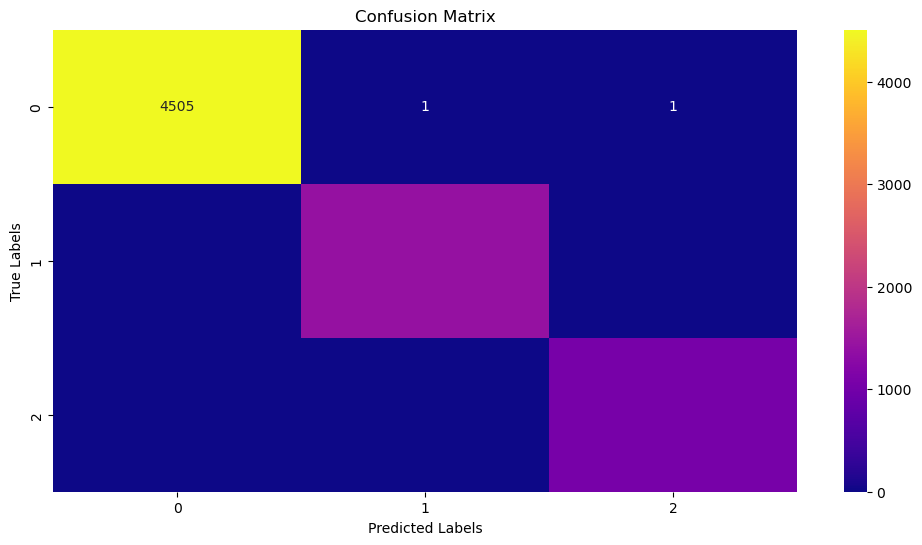

In [58]:
# import 
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 6))
sns.heatmap(conf_matrix, annot=True, cmap='plasma', fmt='d', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()